.\magangle.txt
Max value = 0.0061616538, Min value = -0.0046937404


<IPython.core.display.Javascript object>


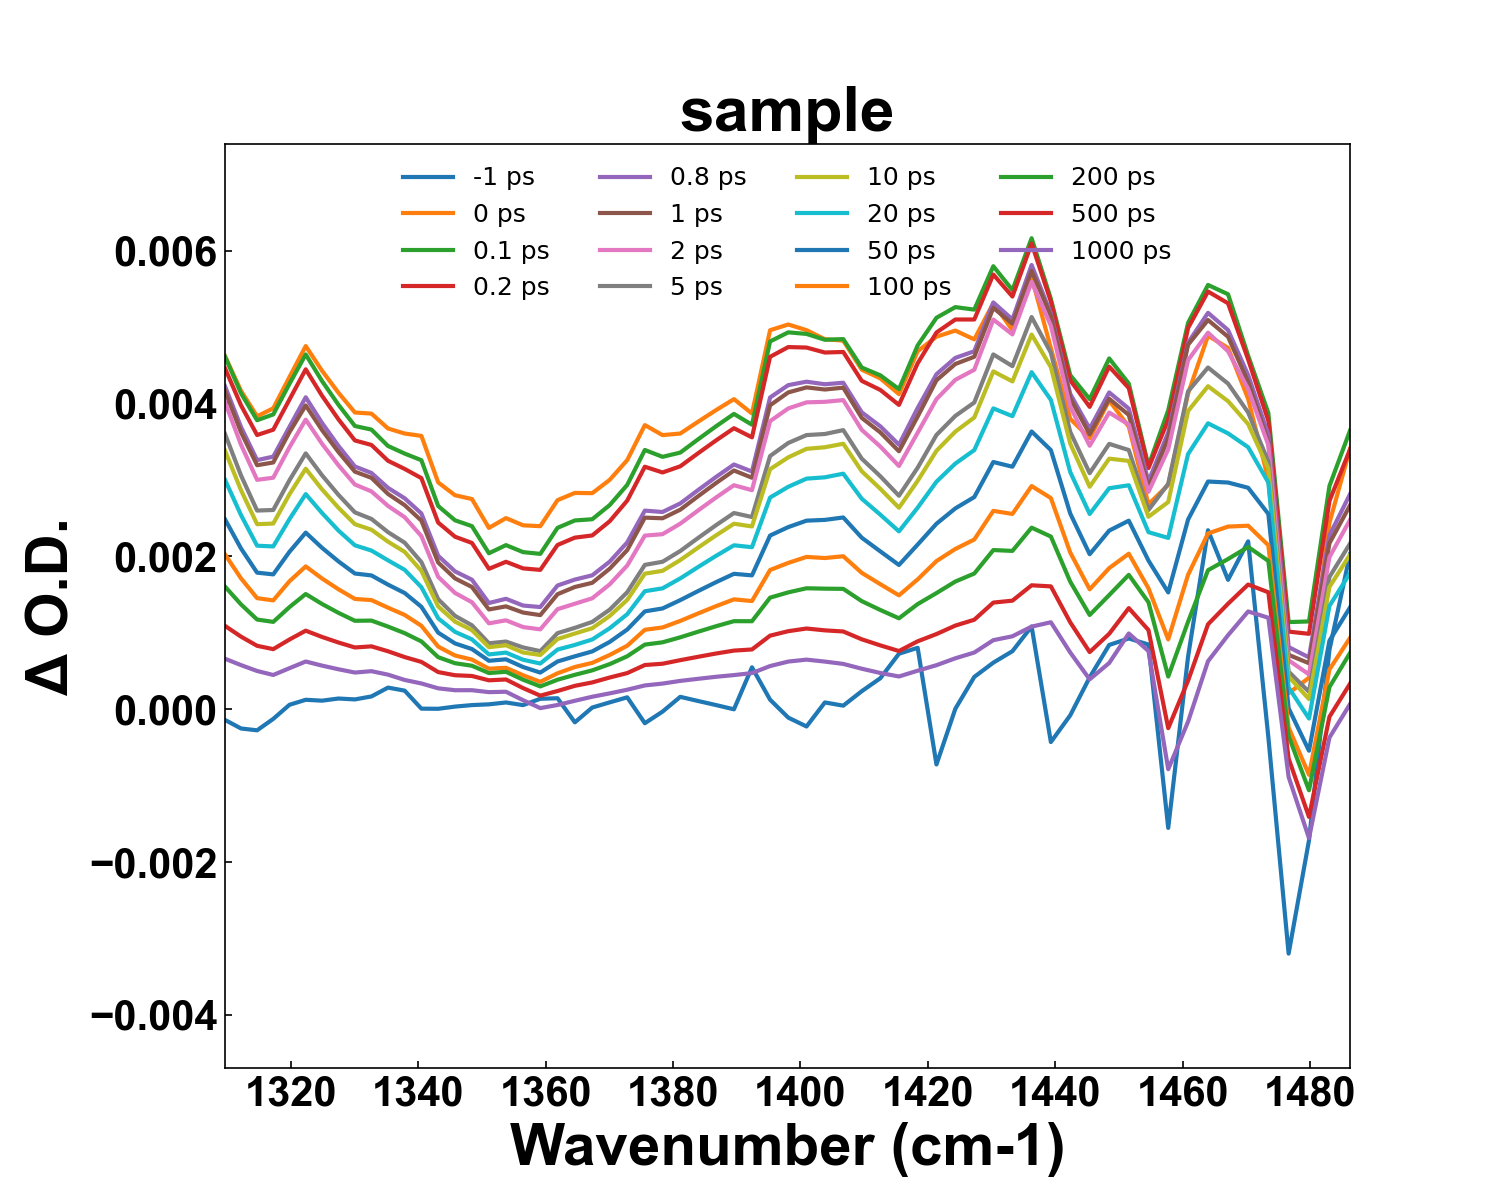

[-1.0, 0.0, 0.1, 0.2, 0.8, 1.0, 2.0000001, 5.0, 10.0000001, 20.0, 50.000001, 100.0, 200.0, 500.00001, 1000.00003]
b= -1
b= 0
b= 0.1
b= 0.2
b= 0.8
b= 1
b= 2
b= 5
b= 10
b= 20
b= 50
b= 100
b= 200
b= 500
b= 1000
end


In [1]:
# drawing utils
%matplotlib notebook
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker, colors
from matplotlib import animation
import matplotlib.ticker
from matplotlib.colors import hsv_to_rgb
# from matplotlib.colors import hsv_to_rgb
#matplotlib.rcParams['text.usetex'] = True

plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

from cycler import cycler

import os
import re


# math utils
import numpy as np

# statistics utils
import pandas as pd 

# 二维数据拆分
def parse_pp_data(file_path,probe_min, probe_max):
    rdata = np.loadtxt(file_path)
    probe_wavelength = rdata[0,1:]
    pw_min = np.absolute(probe_wavelength - probe_min).tolist()
    pw_max = np.absolute(probe_wavelength - probe_max).tolist()
    Delay = rdata[1:,0]
    rdata = rdata[1:,1:]
    probe_min_index = pw_min.index(min(pw_min))
    probe_max_index = pw_max.index(min(pw_max))
    probe_wavelength = probe_wavelength[probe_min_index:probe_max_index]
    data = rdata[:,probe_min_index:probe_max_index]
    Dmax = data.max()
    Dmin = data.min()
    return probe_wavelength, Delay, data, Dmax, Dmin

def plot_pp_decay(filepath, sample_name,figfolder_path, selected_wavelength, delay_min, delay_max):
    probe_wavlength,delay, data, dmax, dmin = parse_pp_data(filepath,probe_min, probe_max)
    figtitle = sample_name
    fig,ax=plt.subplots(figsize=(10,8))
    plt.title(figtitle,fontproperties='Arial', fontsize = 30, fontweight='bold')
    plt.xlabel('Wavelength (nm )',fontproperties='Arial', fontsize=28, fontweight='bold')
    plt.ylabel('Wavelength (nm )',fontproperties='Arial', fontsize=28, fontweight='bold')
    plt.xticks(fontproperties='Arial', size=20, weight='bold')
    plt.yticks(fontproperties='Arial', size=20, weight='bold')

def plot_pp_diff_time(filepath, sample_name,figfolder_path, selected_delay, probe_min, probe_max):
    probe_wavlength,delay, data, dmax, dmin = parse_pp_data(filepath,probe_min, probe_max)
    figtitle = sample_name
    print('Max value = {0}, Min value = {1}'.format(data.max(),data.min()))
    fig,ax=plt.subplots(figsize=(10,8))
    plt.title(figtitle,fontproperties='Arial', fontsize = 30, fontweight='bold')
    plt.xlabel('Wavelength (nm )',fontproperties='Arial', fontsize=28, fontweight='bold')
    plt.ylabel('Wavelength (nm )',fontproperties='Arial', fontsize=28, fontweight='bold')
    plt.xticks(fontproperties='Arial', size=20, weight='bold')
    plt.yticks(fontproperties='Arial', size=20, weight='bold')
    nilines = len(selected_delay)
    colors = []
    selected_delay2 = []
    for i in range(len(selected_delay)):
        if selected_delay[i]+min(abs(delay-selected_delay[i])) not in selected_delay2:
            selected_delay2.append(selected_delay[i]+min(abs(delay-selected_delay[i])))
    for i in range(len(selected_delay)):
        colors.append(hsv_to_rgb((i/len(selected_delay)/3*2, 1, 0.8)))
    print(selected_delay2)
    default_cycler = cycler(color=colors)
    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    for i in range(len(delay)):
        if min(abs(delay[i]-selected_delay2))<0.0001:
            xs = data[i,:]
            delay[i]=int('{:.0f}'.format(delay[i]*10000))/10000
            b = str(delay[i])
            for i in b:
                if b[-1]=='0':
                    b=b[:-1]
                elif b[-1] == '.':
                    b=b[:-1]
                    break
                else:
                    break
            ax.plot(probe_wavlength, xs, linewidth=2, label=b + ' ps',)
#    ax.legend(loc='upper center',ncol=4, prop = 'Arial',fontsize= 'large')
#    ax.grid()
    plt.subplots_adjust(left=0.15)
    ax.set(xlabel='Wavenumber (cm-1)', ylabel='Δ O.D.', title=figtitle)
    ax.set(xlim=(probe_wavlength.min(), probe_wavlength.max()))
    ax.set(ylim=(dmin,dmax*1.2))
    plt.title(figtitle,fontproperties='Arial', fontsize = 30, fontweight='bold')
    ax.legend(loc='upper center',ncol=4,fontsize= 'large',frameon=False)
    plt.show()
    if not os.path.exists('./'+figfolder_path):
        os.makedirs('./'+figfolder_path)
#    figpath = delay+'.png'
#    print(figpath)   
    figpath=r'./'+figfolder_path+r'/'+sample_name+'_PP_Diff_Time.png'
    fig.savefig(figpath, dpi=200, format='png')

folder_path=r'.'

#print(file_dict)
file_name=r'magangle.txt'
file_path = folder_path+'\\'+file_name
print(file_path)
#sample_name = re.split(r'\\',folder_path)[-2]
sample_name = 'sample'
#folder_name =sample_name+'-'+re.findall(r'\\([0-9a-z-]+?)w',folder_path)[0]+'w'
folder_name = 'guan'
delay_min = -0.5
delay_max = 3
probe_min = 450
probe_max = 800
selected_delay = [-1,0,0.1,0.2,0.75,1,2,5,10,20,50,100,200,500,1000]
plot_pp_diff_time(file_path,sample_name,folder_name,selected_delay,probe_min, probe_max)

print('end')